# Testing Homography / Perspektiv Transformation

In [1]:
import cv2
import numpy as np

In [2]:
# Load the image and the floor plan
image = cv2.imread("Ch4_image.png")
floor_plan = cv2.imread("Ch4_floor_plan.png")

In [3]:
# Convert the images to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_floor_plan = cv2.cvtColor(floor_plan, cv2.COLOR_BGR2GRAY)

In [4]:
# known camera position
camera_position = np.array([0,0,1])

In [5]:

src_pts = []
dst_pts = []


def select_points_img(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        src_pts.append([x, y])
        print("image point selected:", x, y)
        
def select_points_plan(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        dst_pts.append([x, y])
        print("floor plan point selected:", x, y)

cv2.namedWindow("image")
cv2.setMouseCallback("image", select_points_img)

while True:
    cv2.imshow("image", image)
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q"):
        break

cv2.destroyAllWindows()

cv2.namedWindow("floor_plan")
cv2.setMouseCallback("floor_plan", select_points_plan)

while True:
    cv2.imshow("floor_plan", floor_plan)
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q"):
        break

cv2.destroyAllWindows()

# convert the points to numpy array
src_pts = np.array(src_pts)
dst_pts = np.array(dst_pts)

image point selected: 1113 558
image point selected: 934 1336
image point selected: 1545 1323
image point selected: 1415 538
floor plan point selected: 343 599
floor plan point selected: 344 917
floor plan point selected: 406 918
floor plan point selected: 408 610


In [6]:

# The difference between findHomography and getPerspectiveTransform is that findHomography can handle
# some distortion in the image, while getPerspectiveTransform assumes that the image is not distorted.
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

In [7]:
H

array([[-2.59467005e+00, -4.56903807e+00,  2.66260363e+03],
       [-2.06819816e+00, -1.43430592e+01,  5.45956587e+03],
       [-2.14564622e-03, -1.20101342e-02,  1.00000000e+00]])

In [8]:

# align the image with the floor plan
height, width = gray_floor_plan.shape
aligned_image = cv2.warpPerspective(image, H, (width, height))

In [13]:
print(image)

[[[ 40  40  40]
  [ 40  40  40]
  [ 40  40  40]
  ...
  [ 34  30  29]
  [ 34  30  29]
  [ 34  30  29]]

 [[ 40  40  40]
  [ 40  40  40]
  [ 40  40  40]
  ...
  [ 34  30  29]
  [ 34  30  29]
  [ 34  30  29]]

 [[ 40  40  40]
  [ 40  40  40]
  [ 40  40  40]
  ...
  [ 34  30  29]
  [ 34  30  29]
  [ 34  30  29]]

 ...

 [[135 141 127]
  [135 141 127]
  [132 138 124]
  ...
  [131 140 131]
  [131 140 131]
  [131 140 131]]

 [[135 139 131]
  [135 139 131]
  [131 135 127]
  ...
  [131 140 132]
  [131 140 132]
  [131 140 132]]

 [[135 139 131]
  [135 139 131]
  [131 135 127]
  ...
  [131 140 132]
  [131 140 132]
  [131 140 132]]]


In [14]:
print(aligned_image)

[[[116 122 128]
  [ 48  61  71]
  [203 222 231]
  ...
  [ 25  23  22]
  [ 31  29  28]
  [ 36  34  33]]

 [[191 197 203]
  [ 26  35  45]
  [189 209 218]
  ...
  [ 27  25  24]
  [ 33  31  30]
  [ 36  34  33]]

 [[234 239 243]
  [ 41  49  58]
  [147 166 175]
  ...
  [ 28  26  25]
  [ 34  32  31]
  [ 36  34  33]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


: 

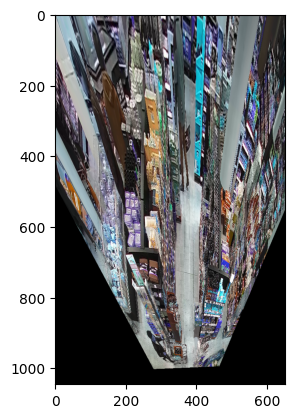

In [9]:
import matplotlib.pyplot as plt

# Display the aligned image
plt.imshow(aligned_image)
plt.show()

In [12]:
# specify the opacity of the overlay
alpha = 0.5 

# create an empty image with the same size as the floor plan
overlay = np.zeros_like(floor_plan)

# copy the aligned image to the overlay
overlay[:, :, :] = aligned_image

# apply the overlay to the floor plan with the specified opacity
result = cv2.addWeighted(floor_plan, 1 - alpha, overlay, alpha, 0)

cv2.imwrite("overlay.jpg", result)

True